관광상품 개발을 위해 관광객들의 방문목적 (여행유형), 방문자 수, 만족도 분석을 중점으로 데이터 분류를 시작함


* 어느 지역이 워케이션 관광지로서 매력을 가지고 있는지 알아보고자 함  

* 분석흐름 및 인사이트
주요변수를 통해 어떠한 요소들이 워케이션 만족도에 영향을 미치는지 확인 => 00 지역에 방문한 사람들은 특정 이유로 만족도가 높음 => 만족도가 낮은 사람들에게 만족도가 높은 지역 추천

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%matplotlib inline

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 20 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')

데이터 준비

In [ ]:
rawdf = pd.read_csv('https://raw.githubusercontent.com/shstudy/ITB_3team/main/wo_data_20_21Y%2B11-28.csv', encoding = 'CP949')

In [ ]:
rawdf['재방문여부'] = rawdf['재방문의도'] > 3
x2 = {'재방문여부' :{False:'재방문NO',True:'재방문YES'}}
rawdf.replace(x2, inplace=True)

In [ ]:
df = rawdf.copy()

데이터 전처리


In [ ]:
df.columns

Index(['ID', '연도', '성별', '연령', '학력', '혼인상태', '거주지역', '직업', '주업', '직장지위',
       '주5일근무제실시여부', '차량보유여부', '개인소득', '관광휴양여부', '여행유형', '월', '계절', '여행일수(박)',
       '여행총경비', '지출비용포함인원수', '1인지출비용', '개인휴가사용여부', '지역코드', '시', '숙박시설',
       '여행활동1', '여행활동2', '여행활동3', '여행활동4', '여행활동5', '주요이동교통수단', '여행지선택이유_1순위',
       '여행지선택이유_2순위', '만족도_자연경관', '만족도_문화유산', '만족도_교통', '만족도_식당및음식', '만족도_쇼핑',
       '만족도_관광정보및안내시설', '만족도_관광지편의시설', '만족도_지역관광종사자의친절성', '만족도_체험프로그램',
       '만족도_관광지물가', '만족도_관광지혼잡도', '전반적만족도', '재방문의도', '타인추천의도', '만족도점수',
       '총만족도_이진', '총만족도', '재방문여부'],
      dtype='object')

#데이터 탐색: 모든 고객

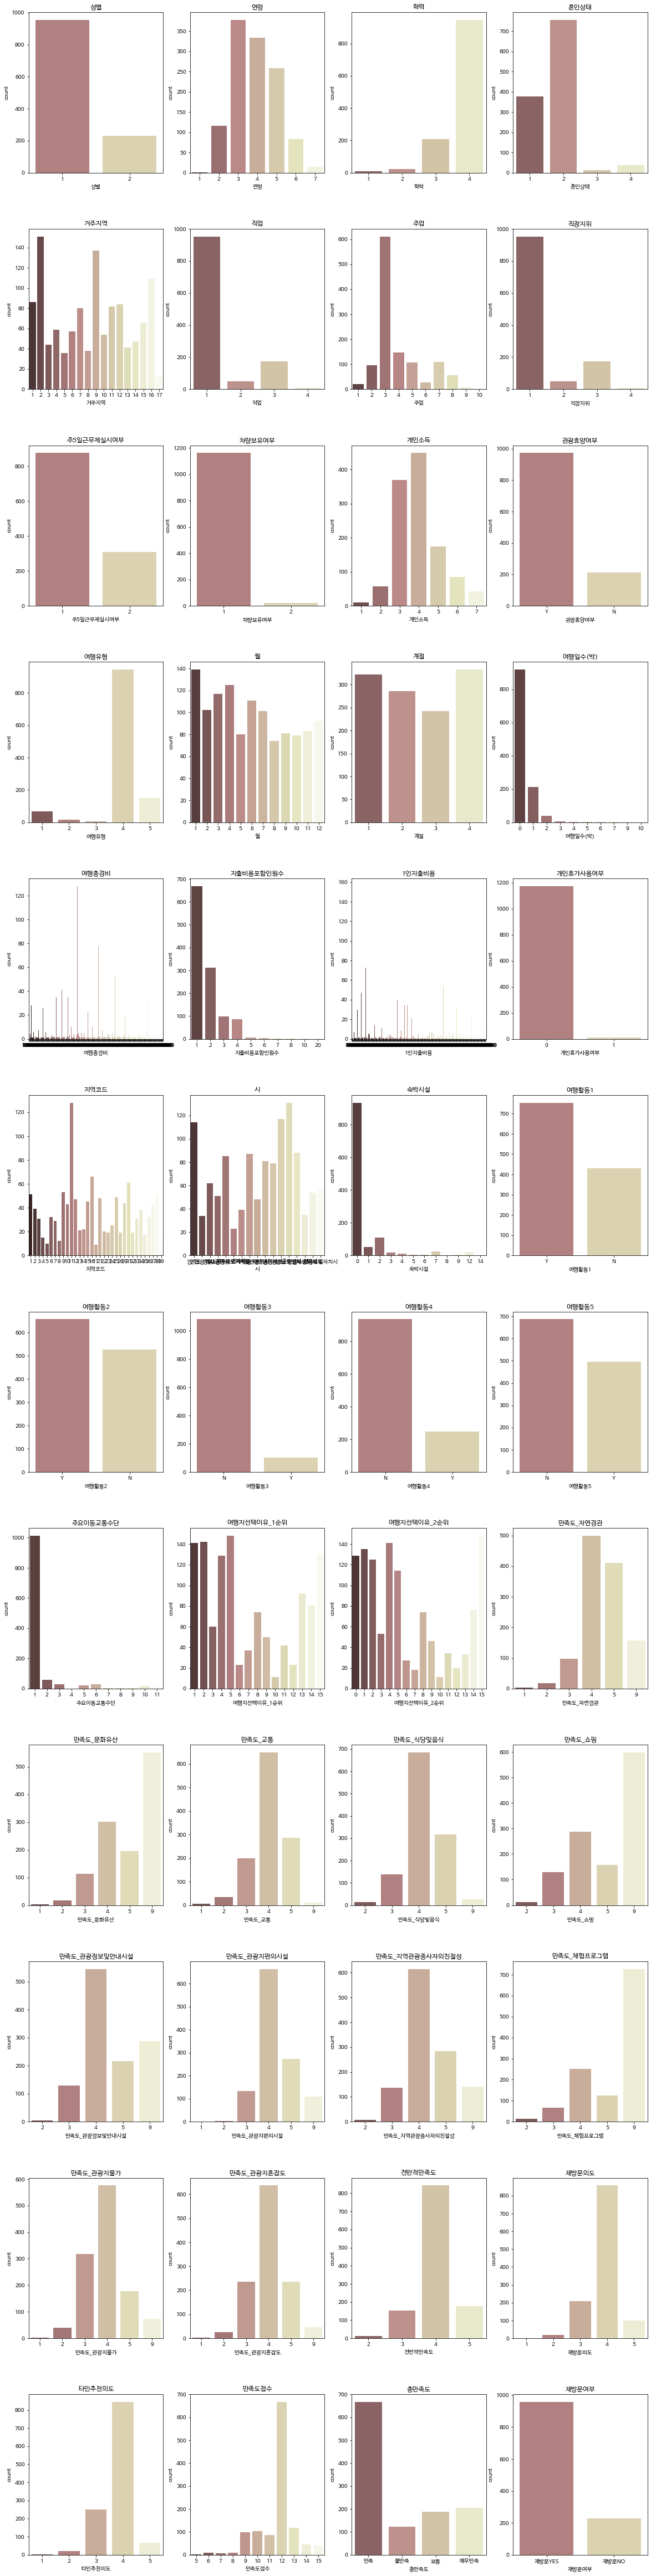

In [ ]:
#모든_고객_데이터_특징

feature = ['성별', '연령', '학력', '혼인상태', '거주지역', '직업', '주업', '직장지위',
       '주5일근무제실시여부', '차량보유여부', '개인소득', '관광휴양여부', '여행유형', '월', '계절', '여행일수(박)',
       '여행총경비', '지출비용포함인원수', '1인지출비용', '개인휴가사용여부', '지역코드', '시', '숙박시설',
       '여행활동1', '여행활동2', '여행활동3', '여행활동4', '여행활동5', '주요이동교통수단', '여행지선택이유_1순위',
       '여행지선택이유_2순위', '만족도_자연경관', '만족도_문화유산', '만족도_교통', '만족도_식당및음식', '만족도_쇼핑',
       '만족도_관광정보및안내시설', '만족도_관광지편의시설', '만족도_지역관광종사자의친절성', '만족도_체험프로그램',
       '만족도_관광지물가', '만족도_관광지혼잡도', '전반적만족도', '재방문의도', '타인추천의도', '만족도점수','총만족도', '재방문여부']
plt.figure(figsize=(20,100))

for i in range(len(feature)):
    plt.subplot(15,4,i+1)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
    plt.title(feature[i])
    sns.countplot(x= df[feature[i]], data = df1, palette='pink')
plt.show()

In [ ]:
len(feature)

48

In [ ]:
df1.columns

Index(['성별', '연령', '학력', '혼인상태', '거주지역', '직업', '주업', '직장지위', '주5일근무제실시여부',
       '차량보유여부', '개인소득', '관광휴양여부', '여행유형', '월', '계절', '여행일수(박)', '여행총경비',
       '지출비용포함인원수', '1인지출비용', '개인휴가사용여부', '지역코드', '시', '숙박시설', '여행활동1',
       '여행활동2', '여행활동3', '여행활동4', '여행활동5', '주요이동교통수단', '여행지선택이유_1순위',
       '여행지선택이유_2순위', '만족도_자연경관', '만족도_문화유산', '만족도_교통', '만족도_식당및음식', '만족도_쇼핑',
       '만족도_관광정보및안내시설', '만족도_관광지편의시설', '만족도_지역관광종사자의친절성', '만족도_체험프로그램',
       '만족도_관광지물가', '만족도_관광지혼잡도', '전반적만족도', '재방문의도', '타인추천의도', '만족도점수',
       '총만족도_이진', '총만족도', '재방문여부'],
      dtype='object')

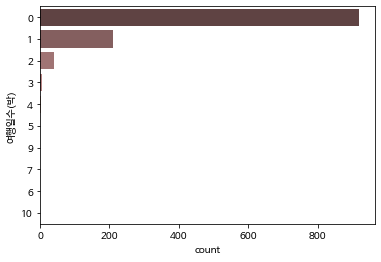

In [ ]:
sns.countplot(y="여행일수(박)", data=df1, order = df1["여행일수(박)"].value_counts().index, palette='pink')

*개인수집 데이터에 따르면 당일치기가 많음.

https://www.noblesse.com/home/news/magazine/detail.php?no=10756

짧게는 당일치기부터 시작한다. 지난여름 인터컨티넨탈 서울 코엑스는 주중 한정 오전 8시부터 12시간 머물 수 있는 ‘하프데이 스페셜’ 패키지를 내놨다. 이미지 관리 차원에서 대실을 지양했던 특급 호텔로서는 파격적 행보. 당초 한시적으로 선보일 예정이었지만, 호응에 힘입어 판매 기한을 늘렸다고 한다. 현재는 동일한 구성의 ‘팔팔한 하루, 8 to 8 Workcation’ 패키지를 운영 중이다.

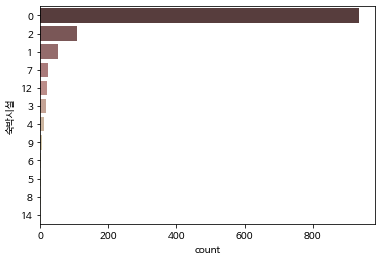

In [ ]:
sns.countplot(y="숙박시설", data=df1, order = df1["숙박시설"].value_counts().index, palette='pink')

당일치기(0) > 모텔여관 > 호텔 > 7 > 12 > 3 > 4 > 9

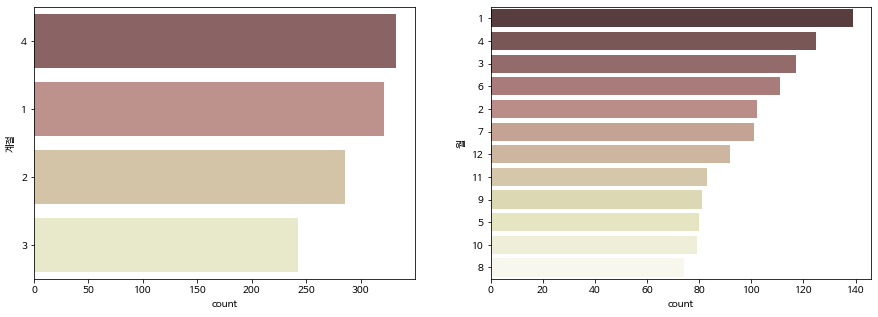

In [ ]:
plt.subplot(1,2,1)
sns.countplot(y="계절", data=df1, order = df1["계절"].value_counts().index, palette='pink')
x3 = {i : {1: '봄',2: '여름', 3: '가을',4: '겨울'}}
df1.replace(x3, inplace=True)
plt.gcf().set_size_inches(15, 5)

plt.subplot(1,2,2)
sns.countplot(y="월", data=df1, order = df1["월"].value_counts().index, palette='pink')
plt.show()


여행빈도수
*  계절: 겨울 > 봄> 여름 > 가을
*  월: 1>4>3>6>2>7>12>11>9>5>10>8

겨울, 봄을 노리는 것이 중요. 여름은 의외로 적음.



In [ ]:
spY = df1[(df1['계절']=='봄') & (df1['재방문여부']=='재방문YES')]
smY = df1[(df1['계절']=='여름') & (df1['재방문여부']=='재방문YES')]
auY = df1[(df1['계절']=='가을') & (df1['재방문여부']=='재방문YES')]
wiY = df1[(df1['계절']=='겨울') & (df1['재방문여부']=='재방문YES')]

In [ ]:
print(len(spY) / len(df1['계절']=='봄'))
print(len(smY) / len(df1['계절']=='여름'))
print(len(auY) / len(df1['계절']=='가을'))
print(len(wiY) / len(df1['계절']=='겨울'))

0.0
0.0
0.0
0.0


*   재방문 비율이 높은 순서: 봄>겨을>여름>가을



In [ ]:
df1.groupby(df1['계절'])['만족도점수'].mean()

계절
1    11.773292
2    11.608392
3    11.654321
4    11.666667
Name: 만족도점수, dtype: float64

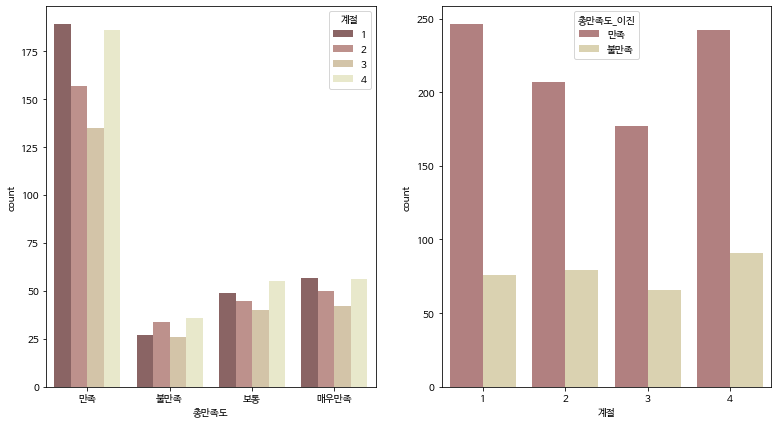

In [ ]:
plt.subplot(1,2,1)
sns.countplot(x="총만족도", hue="계절", data=df1, palette='pink')
plt.gcf().set_size_inches(13, 7)

plt.subplot(1,2,2)
sns.countplot(x="계절", hue="총만족도_이진", data=df1, palette='pink')

plt.show()

* 만족도 평균은 11점대로 비슷.

* 전체적으로 봄, 겨울이 만족도 측면에서 좋음.
워케이션하면 여름이 많이 이미지상 떠오르지만 실제로 좋은 평가가 있는 시점은 겨울, 봄.


In [ ]:
spN = df1[(df1['계절']=='봄') & (df1["총만족도"]=='불만족')]
smN = df1[(df1['계절']=='여름') & (df1["총만족도"]=='불만족')]
auN = df1[(df1['계절']=='가을') & (df1["총만족도"]=='불만족')]
wiN = df1[(df1['계절']=='겨울') & (df1["총만족도"]=='불만족')]

print(len(spN) / len(df1['계절']=='봄'))
print(len(smN) / len(df1['계절']=='여름'))
print(len(auN) / len(df1['계절']=='가을'))
print(len(wiN) / len(df1['계절']=='겨울'))

0.0
0.0
0.0
0.0


*불만족도 순서: 겨울>여름>가을>봄

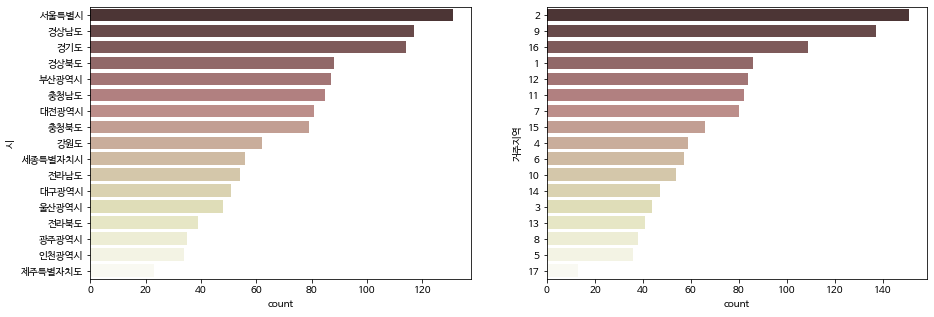

In [ ]:
plt.subplot(1,2,1)
sns.countplot(y="시", data=df1, order = df1["시"].value_counts().index, palette='pink')
plt.gcf().set_size_inches(15, 5)

plt.subplot(1,2,2)
sns.countplot(y="거주지역", data=df1, order = df1["거주지역"].value_counts().index, palette='pink')
plt.show()

관광지별 방문 순위

*   서울특별시>경상남도>경기도>경상북도
* 인기X: 제주>인천>광주>전라북도>울산

거주지역:2>9>16>1>12>11>7>15>4>6>10>14

In [ ]:
x_list = ["여행지선택이유_1순위", "여행지선택이유_2순위"]
for i in x_list:
  x2 = {i : {0: '답변x',1: '여행지 지명도',2: '볼거리 제공',
      3: '저렴한 여행경비',4: '이동 거리',5: '여행할 수 있는 시간',
      6: '숙박시설',7: '쇼핑',8: '음식',9: '교통편',
      10: '체험 프로그램 유무',11: '경험자의 추천', 12: '관광지 편의시설',
      13: '교육성',14: '여행 동반자 유형', 15: '기타'}}
  df1.replace(x2, inplace=True)

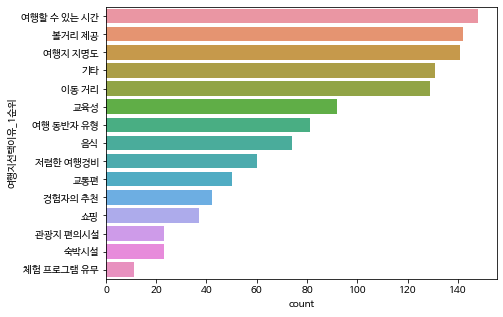

In [ ]:
sns.countplot(y="여행지선택이유_1순위", data=df1, order = df1["여행지선택이유_1순위"].value_counts().index)
plt.gcf().set_size_inches(7, 5)
plt.show()

여행지 선택 이유
* 여행할 수 있는 시간 > 볼거리 제공 > 여행 지명도

방문횟수 top3 지역의 여행지 선택이유

In [ ]:
locaTop3_df = df1[(df1['시'] == '서울특별시')|(df1['시'] == '경상남도')|(df1['시'] == '경기도')]

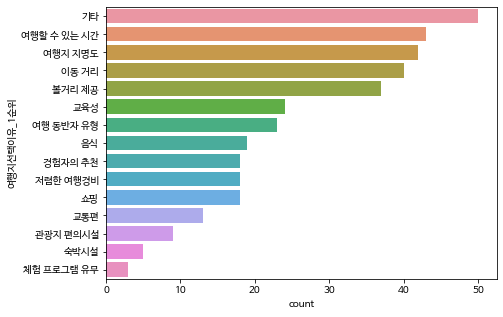

In [ ]:
sns.countplot(y="여행지선택이유_1순위", data=locaTop3_df, order = locaTop3_df["여행지선택이유_1순위"].value_counts().index)
plt.gcf().set_size_inches(7, 5)
plt.show()

##인프라 우수 지역에 따른 워케이션 지역 순위
* '만족도_식당및음식', '만족도_쇼핑', '만족도_관광정보및안내시설', '만족도_관광지편의시설' 높은 점수를 받은 지역 위주로 뽑기.
* 외곽지역보다 (인프라때문에)수도권을 선호하는지

In [ ]:
goodinf = df1[(df1['만족도_식당및음식'] > 3) & (df1['만족도_쇼핑'] > 3) &
           (df1['만족도_관광정보및안내시설'] > 3) & (df1['만족도_관광지편의시설'] > 3)]

badinf = df1[(df1['만족도_식당및음식'] < 4) | (df1['만족도_쇼핑'] < 4) &
           (df1['만족도_관광정보및안내시설'] < 4) | (df1['만족도_관광지편의시설'] < 4)]

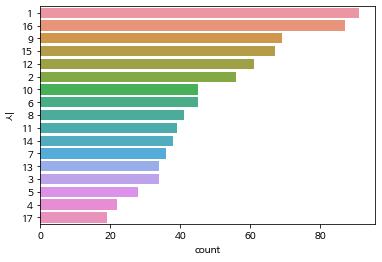

In [ ]:
sns.countplot(y='시', data=goodinf, order = goodinf['시'].value_counts().index) #인프라 만족도 높음 4~5점

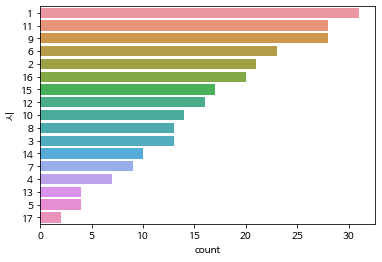

In [ ]:
sns.countplot(y='시', data=badinf, order = badinf['시'].value_counts().index) #인프라 만족도 낮음 1~2점
#쇼핑이나 음식이 안좋거나, 관광지정보나 관광지 편의시설이 안좋거나

##차량보유한 사람들 어느지역으로 워케이션 많이 갔는지

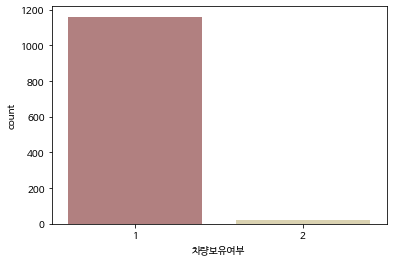

In [ ]:
sns.countplot(x='차량보유여부',data=df1, palette='pink')

In [ ]:
cardf = df1[(df1['차량보유여부'] == 1)]

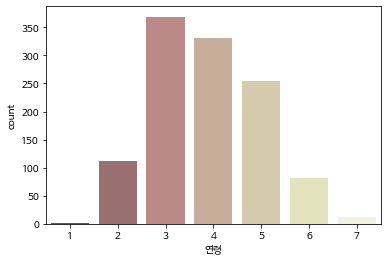

In [ ]:
sns.countplot(x='연령', data=cardf, palette='pink')

나이대: 3>4>5

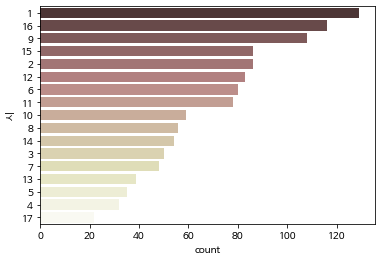

In [ ]:
sns.countplot(y='시', data=cardf, order = cardf['시'].value_counts().index, palette='pink')
plt.show()

*데이터 내 차량 보유자가 많아서 그런지, 전체 데이터와 비교했을 때 큰 차이 없음.

In [ ]:
carXdf = df1[(df1['차량보유여부'] == 2)]

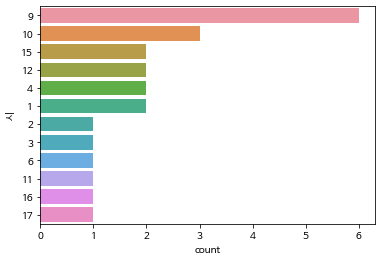

In [ ]:
sns.countplot(y='시', data=carXdf, order = carXdf['시'].value_counts().index)
plt.show()

* 차가 없는 사람은 경기, 강원으로 감.

## 여행 유형과 그에 따른 지역 확인

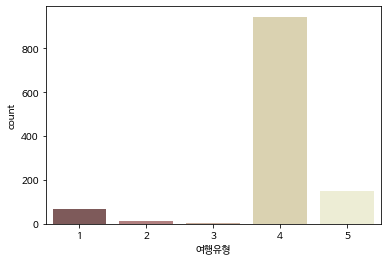

In [ ]:
sns.countplot(x='여행유형', data = df1, palette='pink')

In [ ]:
df1['여행유형'].value_counts()

4    945
5    150
1     69
2     15
3      5
Name: 여행유형, dtype: int64

* 관광지 방문형이 가장 많음.
관광지 방문 > 교육연수> 휴식 휴양

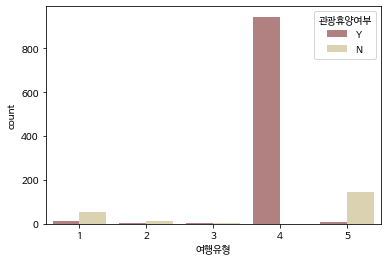

In [ ]:
sns.countplot(x='여행유형', hue= '관광휴양여부', data = df1, palette='pink')

* 휴식 유형, 교육연수 유형은 놀러온 것보다 일하러 온 목적.
* 관광지방문형은 확실한 관광 휴양 목적.

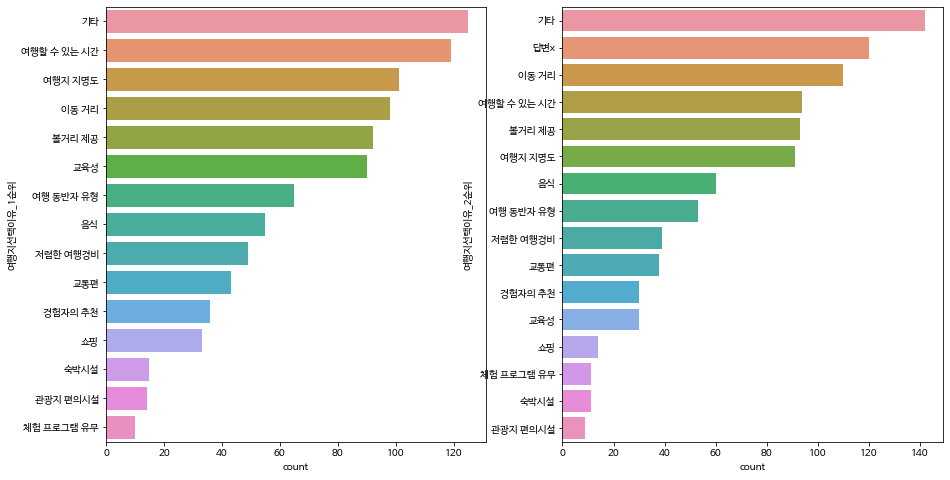

In [ ]:
plt.subplot(1,2,1)
plt.gcf().set_size_inches(15,8)
sns.countplot(y="여행지선택이유_1순위", data=type4, order = type4["여행지선택이유_1순위"].value_counts().index)

plt.subplot(1,2,2)
sns.countplot(y="여행지선택이유_2순위", data=type4, order = type4["여행지선택이유_2순위"].value_counts().index)
plt.show()

#프리랜서들의 워케이션

직장지위
1. 임금/봉급 근로자
2. 고용원을 둔 사업주
3. 고용원이 없는 자영자
4. 무급가족 종사자

In [ ]:
free = df1[df1['직장지위'] == 3]

* 5>6>4>3

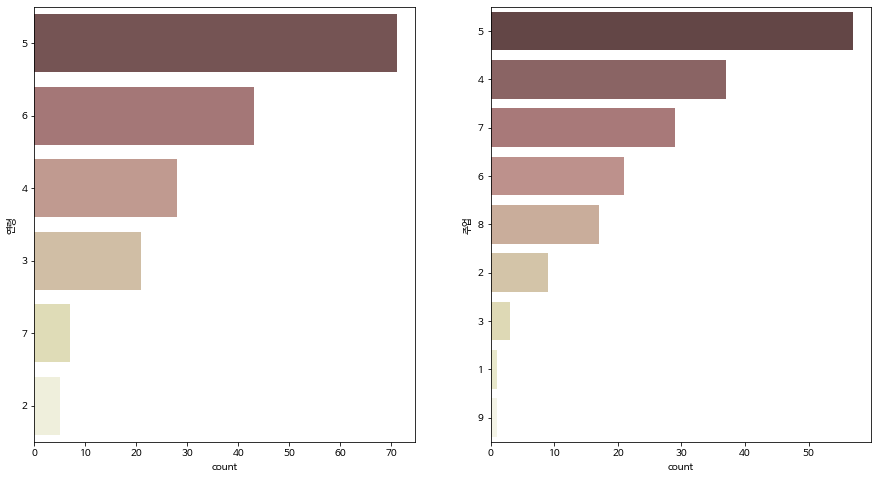

In [ ]:
plt.subplot(1,2,1)
plt.gcf().set_size_inches(15,8)
sns.countplot(y="연령", data=free, order = free["연령"].value_counts().index, palette='pink')

plt.subplot(1,2,2)
sns.countplot(y="주업", data=free, order = free["주업"].value_counts().index, palette='pink')
plt.show()

연령: 5>6>4>3>7>2
주업: 5>4>7>6>8>2>3>1=9

주업
1. 관리자
2. 전문가 및 관련 종사자
3. 사무 종사자
4. 서비스 종사자
5. 판매 종사자
6. 농림어업 숙련 종사자
7. 기능원 및 관련 기능 종사자
8. 장치/기계 조작 및 조립 종사자
9. 단순노무종사자
10. 군인

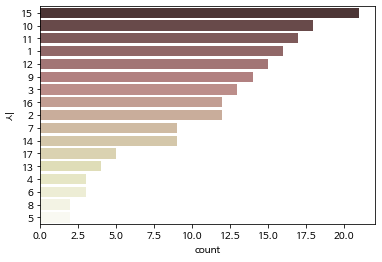

In [ ]:
sns.countplot(y='시', data=free , order = free['시'].value_counts().index, palette='pink')
plt.show()

경상북도>강원도>충청북도>서울

In [ ]:
 free['숙박시설'].value_counts()

0     142
12      9
1       9
2       9
4       2
9       1
3       1
7       1
14      1
Name: 숙박시설, dtype: int64

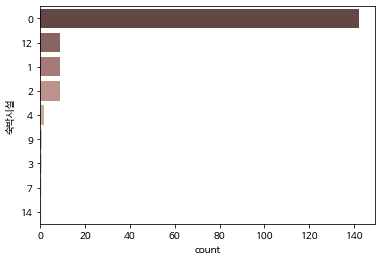

In [ ]:
sns.countplot(y='숙박시설', data=free , order = free['숙박시설'].value_counts().index, palette='pink')
plt.show()

가족, 친지집... = 호텔 = 모텔/여관 >>>>

1. 호텔
2. 모텔/여관
3. 펜션
4. 콘도미니엄/리조트
5. 유스호스텔
6. 야영(캠핑)
7. 연수원/수련원
8. 전통 숙박시설
9. 게스트 하우스
10. 민박(도시형, 농촌형)
11. 자연휴양림 내 숙박시설
12. 가족/친지집
0, 13. 무박 여행
14. 기타

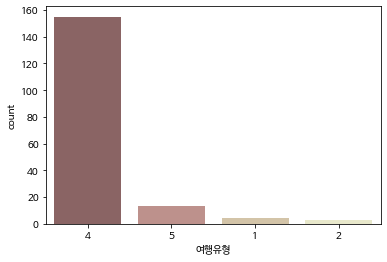

In [ ]:
sns.countplot(x='여행유형', data=free , order = free['여행유형'].value_counts().index, palette='pink')

4>5>1>2

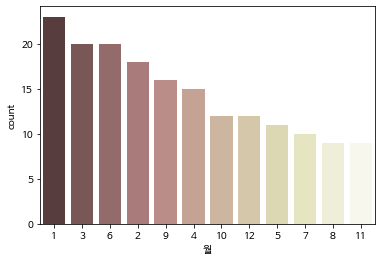

In [ ]:
sns.countplot(x='월', data=free , order = free['월'].value_counts().index, palette='pink')

# 만족도 점수와의 상관관계 확인



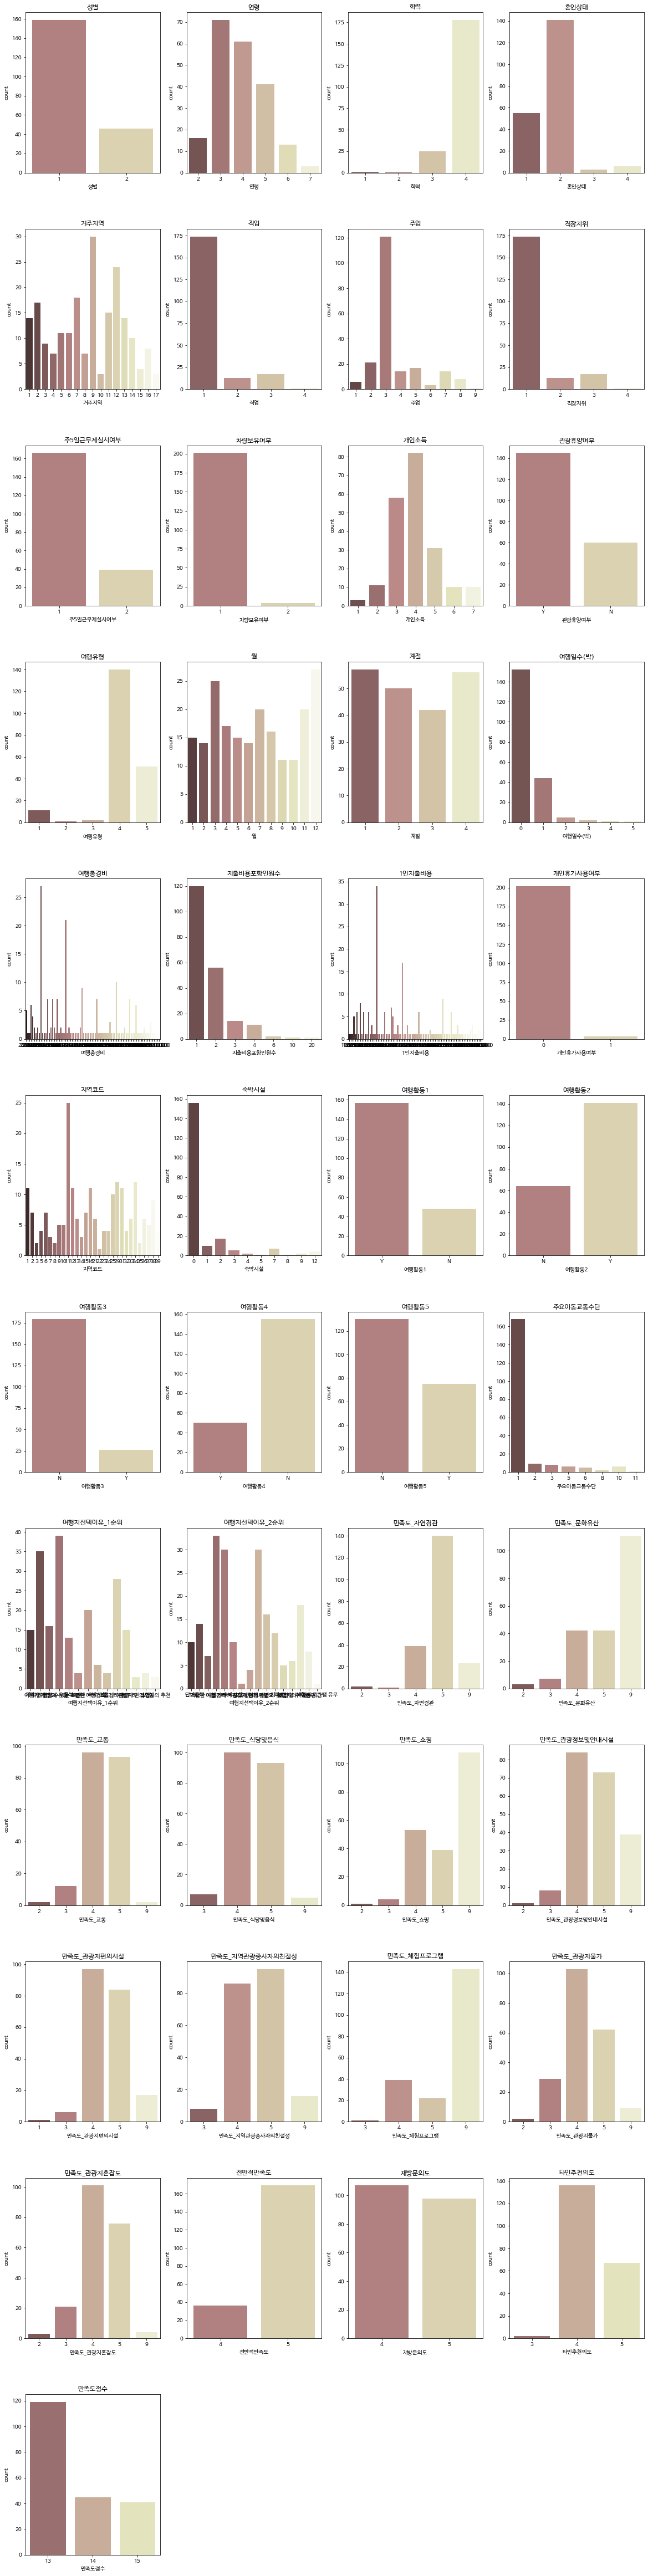

In [ ]:
#매우만족_고객데이터_특징
feature = ['성별', '연령', '학력', '혼인상태', '거주지역', '직업', '주업', '직장지위',
       '주5일근무제실시여부', '차량보유여부', '개인소득', '관광휴양여부', '여행유형', '월', '계절', '여행일수(박)',
       '여행총경비', '지출비용포함인원수', '1인지출비용', '개인휴가사용여부', '지역코드', '숙박시설', '여행활동1',
       '여행활동2', '여행활동3', '여행활동4', '여행활동5', '주요이동교통수단', '여행지선택이유_1순위',
       '여행지선택이유_2순위', '만족도_자연경관', '만족도_문화유산', '만족도_교통', '만족도_식당및음식', '만족도_쇼핑',
       '만족도_관광정보및안내시설', '만족도_관광지편의시설', '만족도_지역관광종사자의친절성', '만족도_체험프로그램',
       '만족도_관광지물가', '만족도_관광지혼잡도', '전반적만족도', '재방문의도', '타인추천의도', '만족도점수']
plt.figure(figsize=(20,100))

for i in range(len(feature)):
    plt.subplot(15,4,i+1)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
    plt.title(feature[i])
    sns.countplot(x= vg_df[feature[i]], data = vg_df, palette='pink')
plt.show()

##불만족 고객

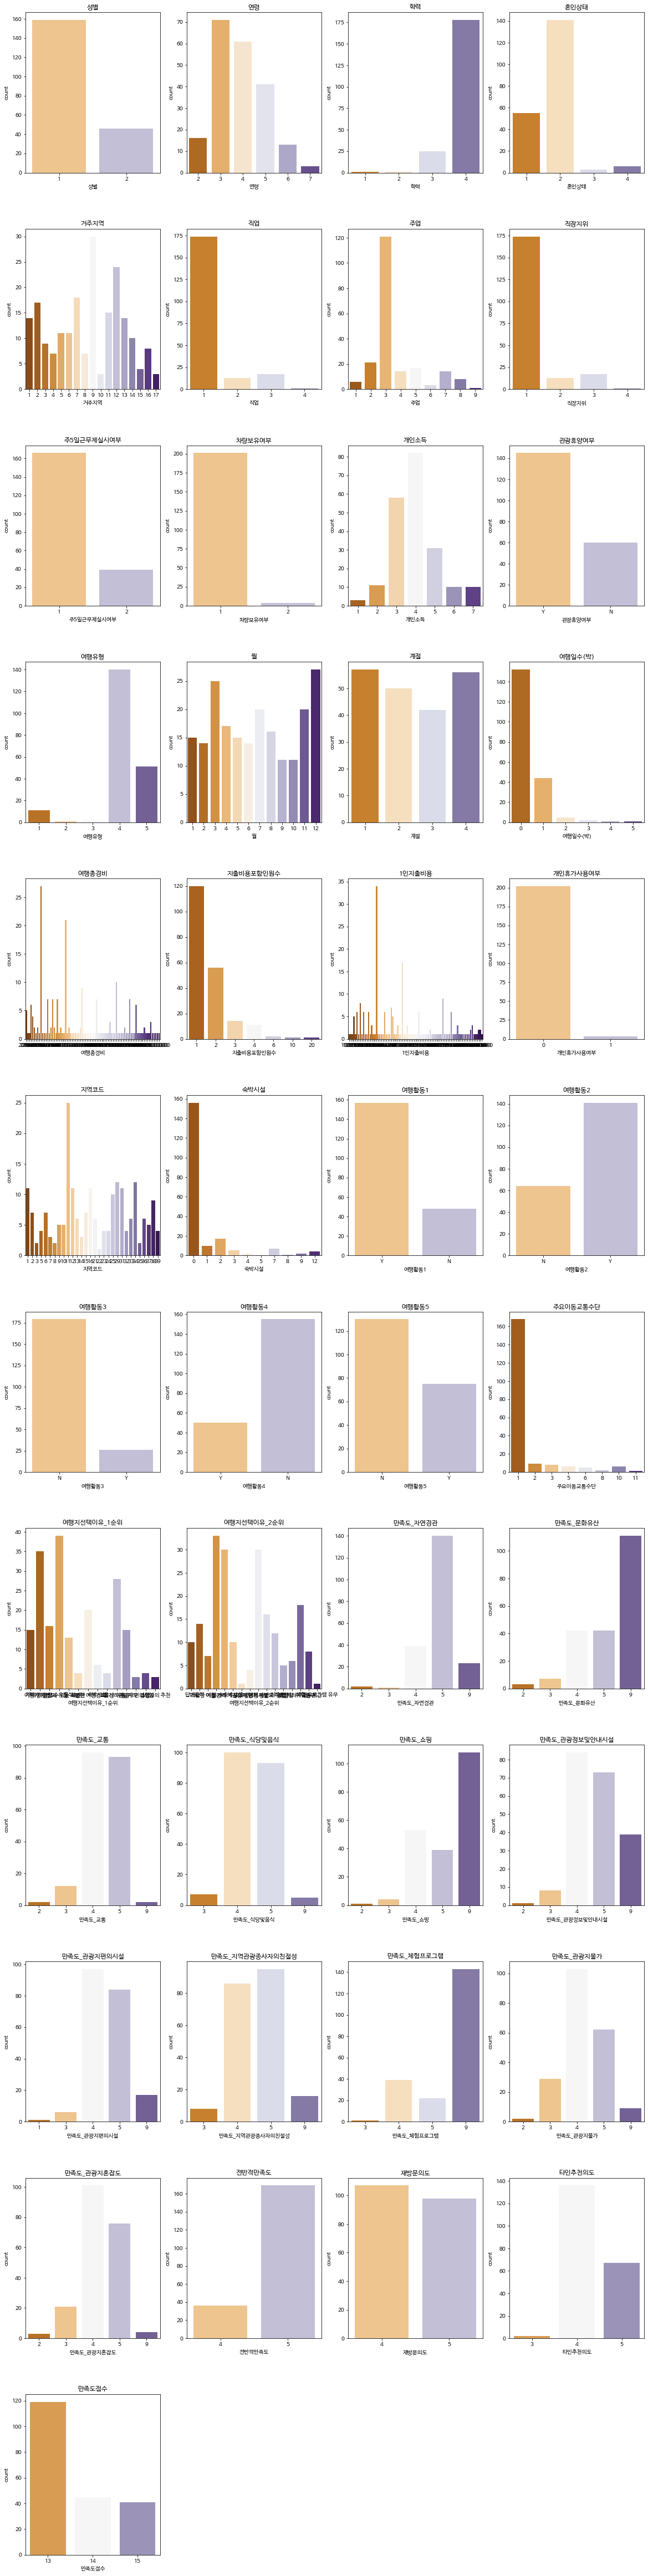

In [ ]:
#불만족_고객데이터_특징
feature = ['성별', '연령', '학력', '혼인상태', '거주지역', '직업', '주업', '직장지위',
       '주5일근무제실시여부', '차량보유여부', '개인소득', '관광휴양여부', '여행유형', '월', '계절', '여행일수(박)',
       '여행총경비', '지출비용포함인원수', '1인지출비용', '개인휴가사용여부', '지역코드', '숙박시설', '여행활동1',
       '여행활동2', '여행활동3', '여행활동4', '여행활동5', '주요이동교통수단', '여행지선택이유_1순위',
       '여행지선택이유_2순위', '만족도_자연경관', '만족도_문화유산', '만족도_교통', '만족도_식당및음식', '만족도_쇼핑',
       '만족도_관광정보및안내시설', '만족도_관광지편의시설', '만족도_지역관광종사자의친절성', '만족도_체험프로그램',
       '만족도_관광지물가', '만족도_관광지혼잡도', '전반적만족도', '재방문의도', '타인추천의도', '만족도점수']
plt.figure(figsize=(20,100))

for i in range(len(feature)):
    plt.subplot(15,4,i+1)
    plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35)
    plt.title(feature[i])
    sns.countplot(x= vg_df[feature[i]], data = b_df, palette='PuOr')
plt.show()